## Importing Required Packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data 

In [9]:
df = pd.read_excel("final_songs_data.xlsx")

## EDA 

In [10]:
# read first 10 records
df.head(10)

,ID,Song Name,Artists,Release Date,Popularity,Genre
0,1,Die With A Smile,"Bruno Mars , Lady Gaga",2024,10,Hollywood
1,2,Always Remember Us This Way,Lady Gaga,2018,2,Hollywood
2,3,Shallow,"Lady Gaga , Bradley Cooper",2018,9,Hollywood
3,4,Poker Face,Lady Gaga,2008,10,Hollywood
4,5,Bad Romance,Lady Gaga,2009,8,Hollywood
5,6,Just Dance,"Lady Gaga , Colby O'Donis",2008,2,Hollywood
6,7,Bloody Mary,Lady Gaga,2011,1,Hollywood
7,8,Judas,Lady Gaga,2011,10,Hollywood
8,9,Million Reasons,Lady Gaga,2016,9,Hollywood
9,10,Applause,Lady Gaga,2013,10,Hollywood


In [11]:
# read last 10 records
df.tail(10)

,ID,Song Name,Artists,Release Date,Popularity,Genre
50632,50633,Sunle Tu Dilki Sadaa,Mohammed Rafi,2008,9,Bollywood
50633,50634,Tum Ko Hum Dilbar,"Amit Kumar, Asha Bhosle",2022,7,Bollywood
50634,50635,Mohabbat Isko Kahte Hain,Mohammed Rafi,2023,8,Bollywood
50635,50636,Goodnight,"Jaspreet Singh, Monali Thakur, Poroma, Sachin ...",2018,8,Bollywood
50636,50637,Dhadkanein Kehti Hai,Abhijeet Sawant,NaN,6,Bollywood
50637,50638,Jana Tumhare Pyar Mein,Mukesh,NaN,6,Bollywood
50638,50639,Tum Jaise Bigde Babu Se,Lata Mangeshkar,2022,7,Bollywood
50639,50640,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",2017,7,Bollywood
50640,50641,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,2018,6,Bollywood
50641,50642,Mummy Aur Daddy Mein Ladai Ho Gayi,Asha Bhosle,2018,6,Bollywood


In [12]:
# get the general info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50642 entries, 0 to 50641
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            50642 non-null  int64 
 1   Song Name     50642 non-null  object
 2   Artists       50632 non-null  object
 3   Release Date  50128 non-null  object
 4   Popularity    50642 non-null  int64 
 5   Genre         50642 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


In [13]:
# get stats analysis of data set
df.describe()

,ID,Popularity
count,50642.000000,50642.000000
mean,25321.500000,5.678844
std,14619.230503,2.885870
min,1.000000,1.000000
25%,12661.250000,3.000000
50%,25321.500000,6.000000
75%,37981.750000,8.000000
max,50642.000000,10.000000


## Removing unwanted columns 

In [15]:
# Dropping ID column
df.drop('ID',axis=1,inplace=True)

In [16]:
df.head()

,Song Name,Artists,Release Date,Popularity,Genre
0,Die With A Smile,"Bruno Mars , Lady Gaga",2024,10,Hollywood
1,Always Remember Us This Way,Lady Gaga,2018,2,Hollywood
2,Shallow,"Lady Gaga , Bradley Cooper",2018,9,Hollywood
3,Poker Face,Lady Gaga,2008,10,Hollywood
4,Bad Romance,Lady Gaga,2009,8,Hollywood


In [17]:
# get the NA rows per column
df.isna().sum()

Song Name         0
Artists          10
Release Date    514
Popularity        0
Genre             0
dtype: int64

## Removing rows containing NA values 

In [18]:
df = df.dropna(axis=0)

In [19]:
df.isna().sum()

Song Name       0
Artists         0
Release Date    0
Popularity      0
Genre           0
dtype: int64

## Removing Duplicate Rows

In [23]:
# Count total duplicates
total_duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {total_duplicates}')

Total duplicate rows: 726


In [24]:
# Remove duplicate rows
df = df.drop_duplicates()

In [25]:
# Count total duplicates
total_duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {total_duplicates}')

Total duplicate rows: 0


## Checking Outliers 

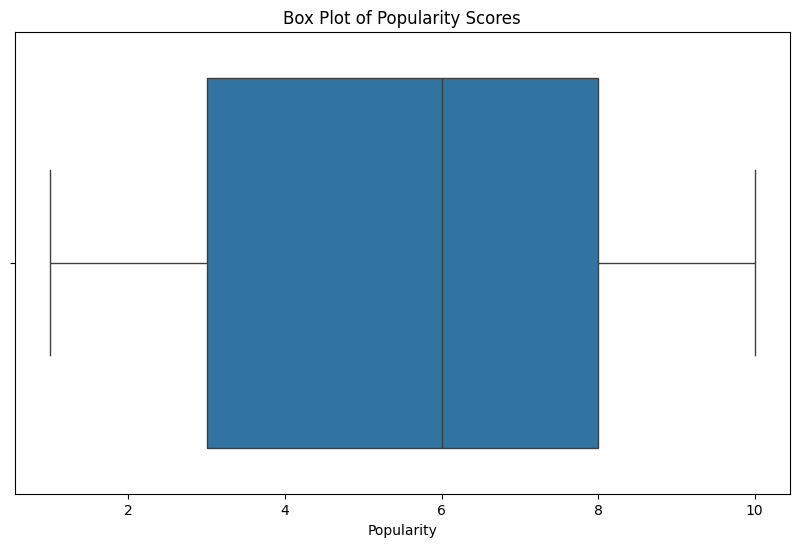

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Popularity'])
plt.title('Box Plot of Popularity Scores')
plt.xlabel('Popularity')
plt.show()

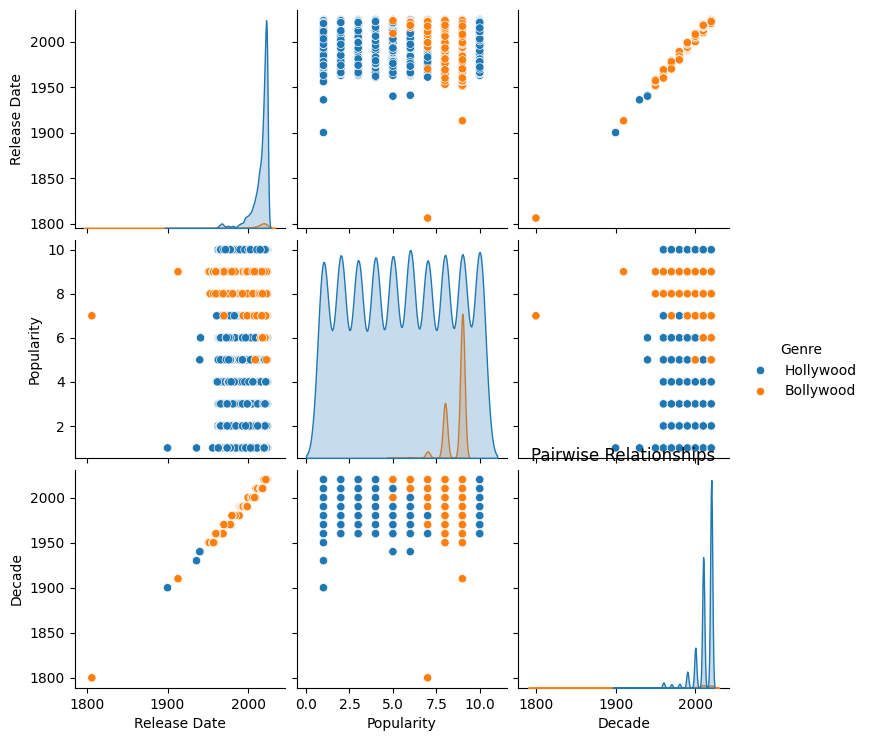

In [39]:
# Pairwise relationships
sns.pairplot(df, hue='Genre', diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()

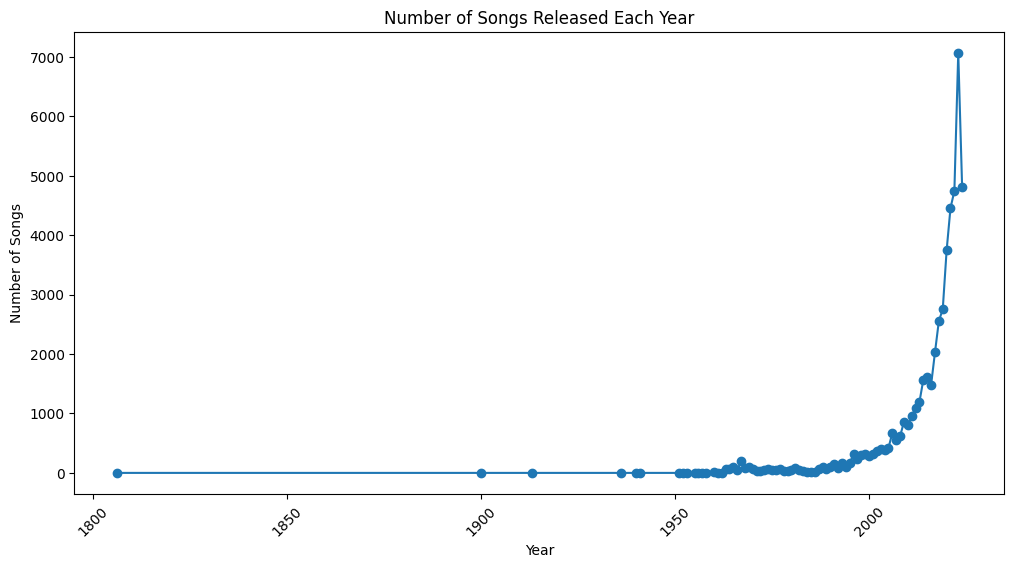

In [40]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y', errors='coerce').dt.year
yearly_counts = df['Release Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

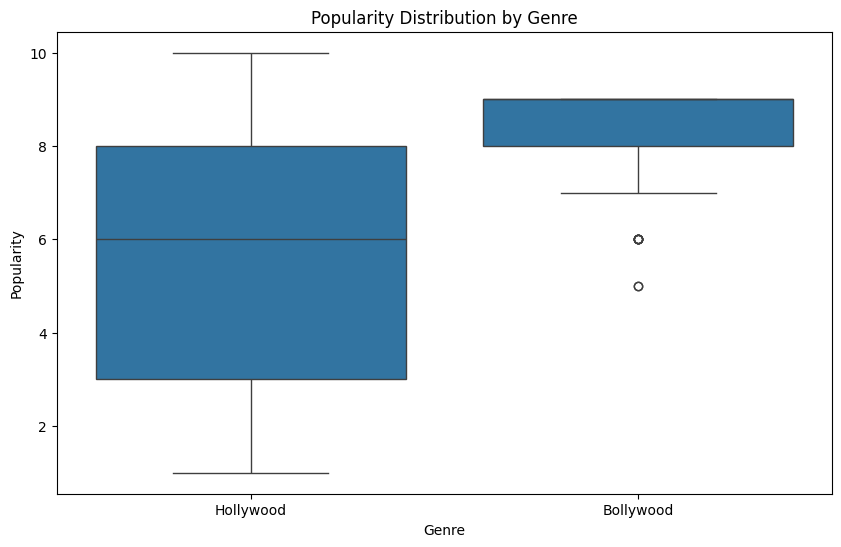

In [43]:
# Comparative analysis of popularity by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Popularity', data=df)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

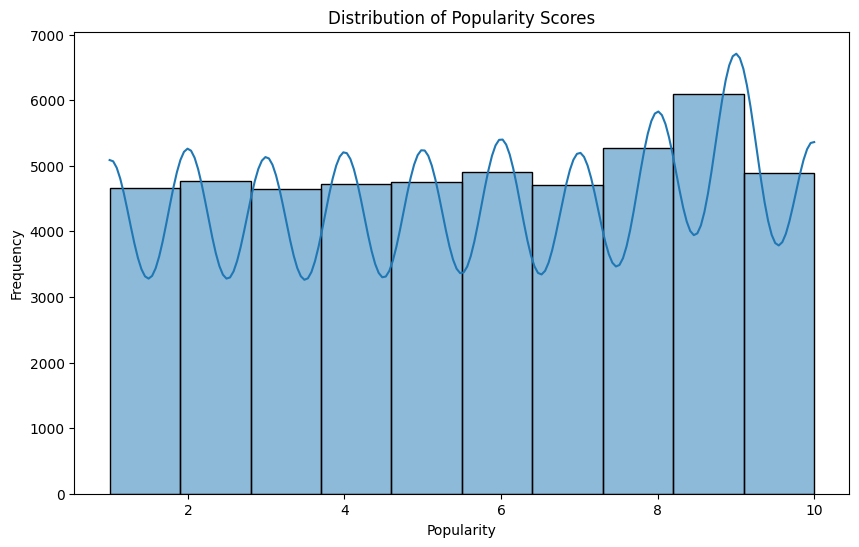

In [45]:
# Distribution of popularity scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=10, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()